# WEEK_04

## 1. 분류(Classification)
- 지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식이다. 분류(Classification)은 기존 데이터가 어느 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것이다.

- 분류는 다양한 머신러닝 알고리즘으로 구현 가능함.
    - 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈 (Naive Bayes)
    - 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
    - 데이터 균일도에 따는 규칙 기반의 결정 트리(Decision Tree)
    - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine) 
    - 근접 거리를 기준으로하는 최소 근접(Nearest Neighbor) 알고리즘
    - 심층 연결 기반의 신경망(Neural Network)
    - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

- 여러 알고리즘 중 앙상블(Ensemble) 방법을 집중적으로 다뤄보자.
    - 앙상블은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉜다. 
    - Bagging 방식의 대표인 Random Forest는 뛰어난 예측성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘임.
    - Boosting의 효시라고 할 수 있는 Gradient Boosting의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠다. 하지만 XGBoost, LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역셍서 가장 활용도가 높은 알고리즘으로 자리 잡았다.


## 2. 결정 트리
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것임.
- 규칙 노드(Decision Node)로 표시된 노드는 규칙 조건이 되는 것이고, 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값이다. 그리고 새로운 규칙 조건마다 Sub Tree가 생성된다.
- 트리의 깊이가 깊어질수록 Overfitting의 위험이 높아져 결정 트리의 성능이 저하될 가능성이 높다. 

- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지렴녀 데이터르 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정하 노드의 규칙이 정해져야 함.
    - Decision Node 는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.
    - 정보의 균일도를 측정하는 대표적인 방법으로 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니 계수가 있다. 
        - Informaiton gain = 1 - Entropy
        - 지니 계수는 0이 가장 평등하고 1로 갈수록 불평등

- 결정 트리 구조

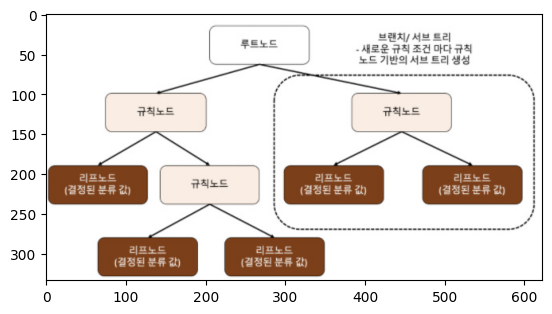

In [1]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('./images/결정트리.jpg')
cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cvt_img)

- 결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할함.

### 2.1. 결정 트리 모델의 특징
- 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적임. 룰이 매우 명확하고 이에 기반해 어떨게 규칙 노드와 리프 노드가 만들어지는지 알 수 있다. 
- 정보의 균일도만 신경쓰면 되므로 특별한 경우를 제외하고 피처의 스케일링과 정규화 같은 데이터 전처리 작업이 필요 없다.
- 가장 큰 단점으로는 과적합으로 정확도가 떨어진다는 점이다. 피처 정보의 균일도에 따른 룰규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가  다양하게 존재할수록 트리의 깊이가 깊어지고 복잡해질 수밖에 없다.

결정트리 특징 | 장점 | 단점
-----|------|-------
_|쉽고 직관적이다. 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음.|과적합으로 알고리즘 성능이 떨어진다, 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요


### 2.2 결정 트리 파라미터
- 사이킷런에서 제공하는 결정 트리 알고리즘 클래스
    - DecisionTreeClassifier (분류)
    - DecisionTreeRegressor  (회귀)
- 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees)알고리즘 기반이다. CART는 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘임.
   - 동일한 parameter 사용 
      - min_samples_split
      - min_samples_leaf
      - max_features
      - max_depth
      - max_leaf_nodes

### 2.3. 결정 트리 모델의 시각화
- Graphviz : 규칙 시각화를 위한 패키지 
    - 사이킷런은 export_graphviz() API 제공

In [2]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 모델 객체 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# load Data then split
iris_data = load_iris()
data = iris_data.data
target = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=11)

print(X_train[:5])
print(y_train[:5])

# Model train
dt_clf.fit(X_train, y_train)

[[5.1 3.5 1.4 0.2]
 [6.9 3.2 5.7 2.3]
 [7.7 2.8 6.7 2. ]
 [5.  3.3 1.4 0.2]
 [4.7 3.2 1.6 0.2]]
[0 2 2 0 0]


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,156
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [3]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

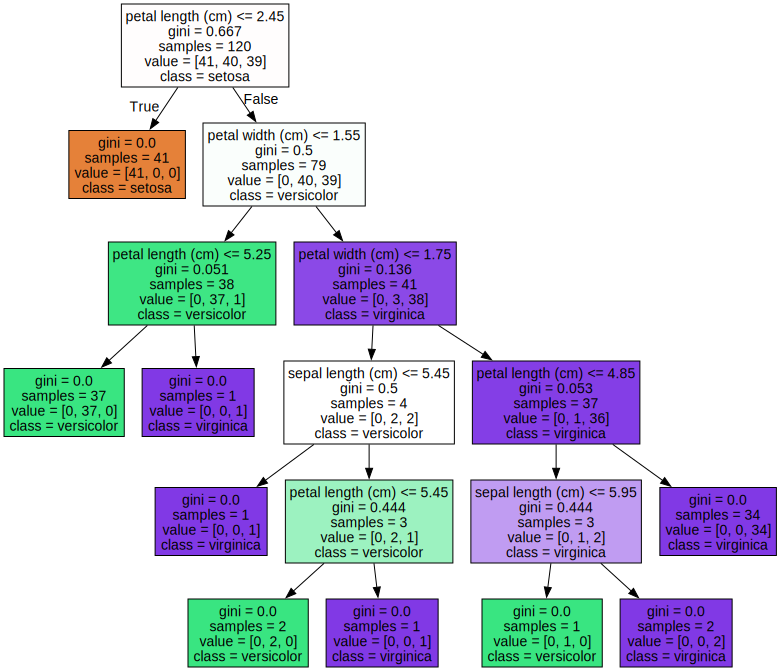

In [4]:
import graphviz
with open('./tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### - 노드 내에 기술된 지표의 의미
- petal length <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건임. 이 조건이 없으면 리프 노드
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples는 현 규칙에 해당하는 데이터 건수
- value=[]는 클래스 값 기반의 데이터 건수임. 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고 있으며, 0:Setosa, 1:Versicolor, 2:Virginica 품종을 가리킨다. 만일 value=[41, 40, 39]라면 클래스 값의 순서로 Setosa 41개 Versicolor 40개, Virginica 39개로 데이터가 구성디어 있다는 의미임.

- 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미한다.
- 색깔이 짙어질수록 지니 계수가 낮고 해당 레이브르이 속하는 샘플 데이터가 많다는 의미임.

#### -> 하이퍼 파라미터를 조절하여 트리의 깊이를 제한할 수 있음. -> 간결한 결정 트리 가능

#### - 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다.
- 중요한 몇개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여함 -> 모델을 좀 더 간결하고 이상치에 강한 모델을 만들수있음.
- 사이킷런은 피처의 중요한 역할 지표를 feature_importance_ 속성으로 제공함.
    - feature_importance_는 ndarray 형태로 값을 반환
    - [0.01667014, 0.02500521, 0.03200643, 0.92631822] 라면 첫번째 피처의 중요도가 0.01667014, 두번 째 피처는 0.02500521와 같이 매치된다.
    - 값이 높을수록 해당 피처의 중요도가 높다는 의미.

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

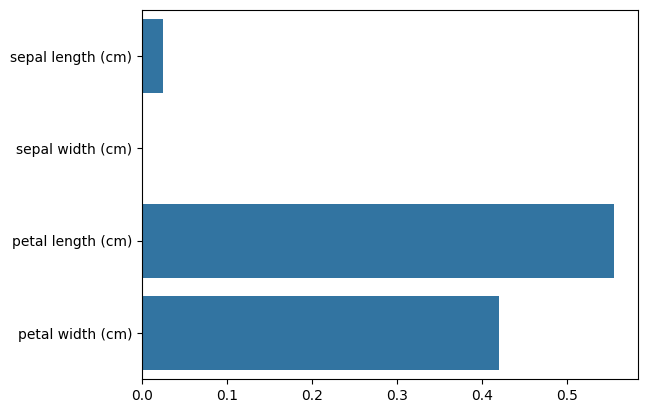

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature_importance 추출
print('Feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# column 별로 시각화 하기 (feature_importance)
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

#### -> petal length가 중요도가 가장 높음을 알 수 있다.

### 2.4. 결정 트리 과적합(Overfitting)
- 결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화해 알아보자.

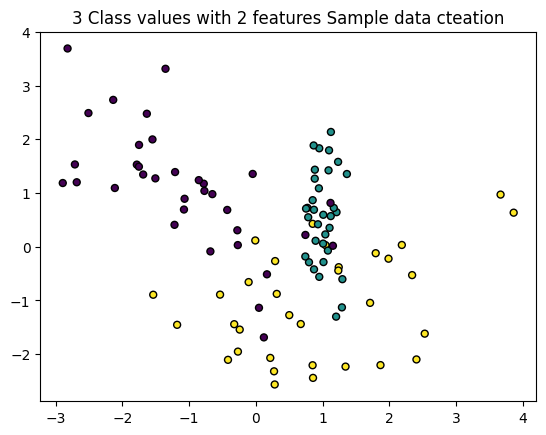

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 features Sample data cteation')

# 2차원 시각화를 위해 피ㅓ는 2개 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')

- 테스트 데이터 세트는 학습 데이터 세트와는 다른 데이터 세트인데, 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있기 때문에 주의가 필요함.

### 2.5. 결정 트리 실습 - 사용자 행동 인식 데이터 세트
- 해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터임.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음, DF으로 로드
feature_name_df = pd.read_csv('./Datasets/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
display(feature_name_df.head())

feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출: ', feature_name[:10])

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


전체 피처명에서 10개만 추출:  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 현재 pandas에서는 중복된 피처명을 허용하지 않음 -> 전처리 필요

In [8]:
feature_dup_df = feature_name_df.groupby('column_name').count()
display(feature_dup_df.head())
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1


column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 총 42개의 피처명이 중복돼 있어, 원본 피처명에 _1, _2를 추가로 부여해 새로운 피처명을 가지는 DF을 반환하는 함수인 get_new_feature_df()생성

In [9]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    

    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                             if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


- Load Dataset 

In [24]:
import pandas as pd

def get_hunan_dataset():

    # 공백으로 분리된 데이터 가져오기
    feature_name_df = pd.read_csv('./Datasets/features.txt', sep='\s+', 
                                  header=None, names=['column_index', 'column_name'])
    
    # 중복 피처명 수정 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처/ 테스트 피처 데이터 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./Datasets/train/X_train.txt', sep='\s+', 
                                  header=None, names=feature_name)
    X_test = pd.read_csv('./Datasets/test/X_test.txt', sep='\s+', 
                                  header=None, names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터 로딩, 칼럼명 action
    y_train = pd.read_csv('./Datasets/train/y_train.txt', sep='\s+', 
                                  header=None, names=['action'])
    y_test = pd.read_csv('./Datasets/test/y_test.txt', sep='\s+', 
                                  header=None, names=['action'])
    
    # 로드된 데이터 반환
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = get_hunan_dataset()

In [12]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [13]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


 - 사이킷런의 DecisionTreeClassifier를 이용해 예측 분류 수행, 하이퍼 파라미터는 디폴트 값으로 수행하고 값을 추출해보기

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# set random-state
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 {0:.4f}'.format(accuracy))

# hyper parameter
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


- GridSerchCV로 최적 하이퍼 파라미터를 알아보자

In [16]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10 ,12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSerchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSerchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSerchCV 최고 평균 정확도 수치: 0.8512
GridSerchCV 최적 하이퍼 파라미터:  {'max_depth': 10}


In [18]:
# cv_results 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그떄의 텍스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844271
4,16,0.850255
5,20,0.850120
6,24,0.849168


- max_depth가 10일 때 0.8512로 정확도가 정점

- 결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊이가 깊어지고 더욱 더 복잡한 모델이 된다. 깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올지 모르지만, 검증 데이터 세트에서는 오히려 과적합으로인한 성능 저하를 유발하게 함.

- 이번엔 max_depth 와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝해보자

In [19]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10 ,12, 16, 20, 24],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSerchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSerchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSerchCV 최고 평균 정확도 수치: 0.8549
GridSerchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [20]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


- 결정 트리에서 각 피처의 중요도를 막대그래프로 시각화 해보자.

<function matplotlib.pyplot.show(close=None, block=None)>

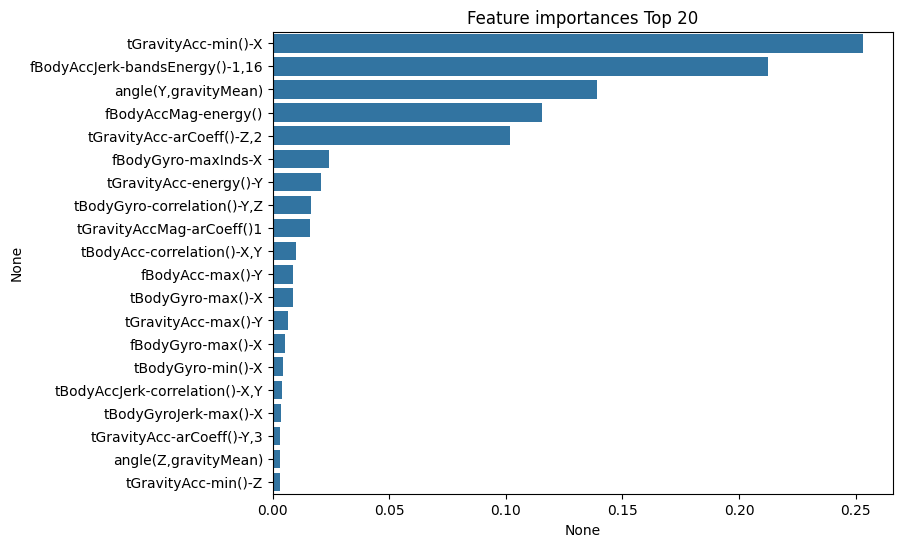

In [21]:
import seaborn as sns

ftr_importances_values = best_dt_clf.feature_importances_
# TOP 중요도로 정렬을 쉽게 하고, seaborn의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show

## 3. 앙상블 학습
- 앙상블 학습을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있다.
- 대표적인 앙상블 알고리즘인 랜덤포레스트와 그래디언트 부스팅 알고리즘은 뛰어난 성능과 쉬운 사용, 다양한 활용도로 인해 그간 분석가 및 데이터 과학자들 사이에서 많이 애용됐다.
- 앙상블 학습의 유형은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있다.
    - Voting : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식, 서로 다른 알고리즘 결합하는 방식
    - Bagging : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식, 각각의 분류기가 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습 후 보팅을 수행함. -> 대표적인 방식 : Random Forest
    - Boosting : 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식.

### 3.1. Hard Voting, Soft Voting
- Hard Voting : 다수결 원칙과 비슷함. 다수의 분류기가 결정한 예측값을 최종 결과값으로 선정.
- Sotf Voting : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 결과값으로 선정. -> 주로 사용됨.
- 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공하고 있음.

In [22]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [23]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


### 3.2. Random Forest

 - 랜덤 포레스트의 기반 알고리즘은 결정 트리
 - 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 함.
 - 부트스트래핑(Bootstrapping) 샘플링 방식 -> 여러 개의 데이터 세트를 중첩되게 분리하는 것

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_hunan_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9223


- 하이퍼 파라미터 및 튜닝
    - 트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소요됨. 그리고 많은 시간을 소요했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않다.
    - 주요 하이퍼 파라미터
        - n_estimators : 결정 트리의 개수, 디폴트는 10개
        - max_features : 결정 트리에 사용된 max_features와 같다. 기본값은 'None'이 아니라 'auto' 즉 'sqrt'와 같다. <- 전체 피처 개수 만큼 참조.
        - max_depth, min_samples_leaf

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9172


In [28]:
# n_estimators 300으로 증가
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9162


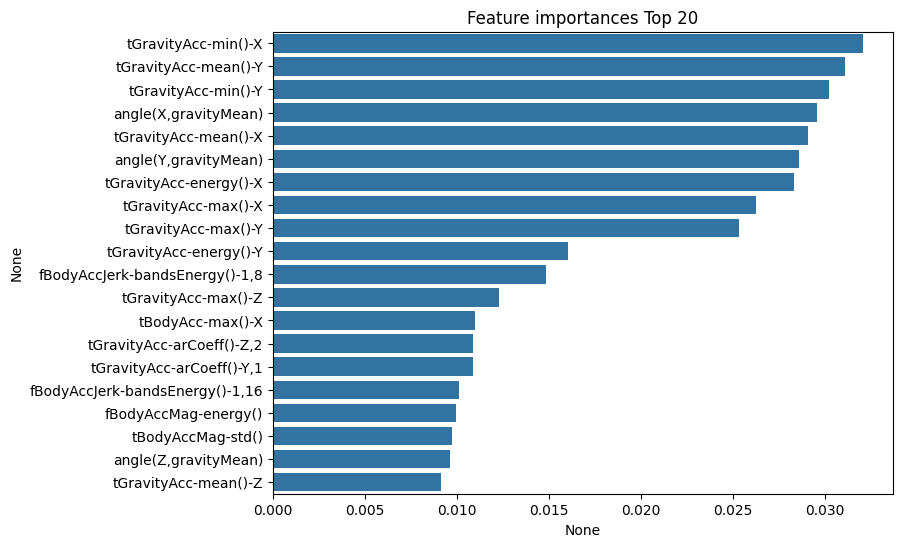

<Figure size 640x480 with 0 Axes>

In [30]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

### 3.3. GBM (Gradient Boosting Machine)
- 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용함.

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_hunan_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9379
GBM 수행 시간: 556.3 초 


- 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냄.
- 일반적으로 GMB이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많음. 그러나 수행 시간이 오래걸리고 하이퍼 파라미터 튜닝 노력도 더 필요함.